In [7]:
import geopandas as gpd
import numpy as np
import pandas as pd
from shapely.geometry import Point

import missingno as msn

import seaborn as sns
import matplotlib.pyplot as plt


from datetime import datetime
import pylab as pl
import os
from IPython import display
from subprocess import call
import subprocess
import sys
sys.path.append(r'C:\Users\Patrick\Documents\GitHub\PatchSim')
import patchsim as sim
import matplotlib.ticker as plticker
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image
import io

%matplotlib inline


### Setting up variables

In [8]:
stages = 6
sc = 'a' # sc='a' for baseline, sc='b' for pull-out

for s in range(stages):
    if s!=3:
        sim.run_disease_simulation(sim.read_config('../data/patchsim/cfg_stage{}.txt'.format(s)),write_epi=True)
    else:
        sim.run_disease_simulation(sim.read_config('../data/patchsim/cfg_stage{}{}.txt'.format(s,sc)),write_epi=True)

out_df = pd.DataFrame()
for s in range(stages):
    if s!=3:
        temp_df = pd.read_csv('../outputs/sample{}.out'.format(s),delimiter=' ',header=None,index_col=0)
    else:
        temp_df = pd.read_csv('../outputs/sample{}{}.out'.format(s,sc),delimiter=' ',header=None,index_col=0)
        
    if s==0:
        out_df = temp_df.copy(deep=True)
    else:
        temp_df.columns = [x+len(out_df.columns) for x in temp_df.columns]
        out_df = out_df.join(temp_df)

In [9]:
evd_df2 = pd.read_csv(r'C:\Users\Patrick\Ebola Project\Ebola_Updated.csv', delimiter='\t')
evd_df2['Date'] = evd_df2.date.apply(lambda x: datetime.strptime(str(x),'%Y%m%d'))
gt2 = evd_df2[evd_df2.health_zone=='all'].total_c.values


In [10]:
evd_df2[evd_df2['date']==20180728]

,date,province,health_zone,total_p,total_c,new_s,total_s,total_d,total_dc,total_cure,total_vacc,Date
0,20180728,Ituri,Bunia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-07-28
1,20180728,Ituri,Komanda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-07-28
2,20180728,Ituri,Mambasa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-07-28
3,20180728,Ituri,Mandima,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-07-28
4,20180728,Ituri,Nyankunde,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-07-28
5,20180728,Ituri,Tchomia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-07-28
6,20180728,Kinshasa,Kinshasa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-07-28
7,20180728,North-Kivu,Alimbongo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-07-28
8,20180728,North-Kivu,Beni,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-07-28
9,20180728,North-Kivu,Biena,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-07-28


In [12]:
out_df.loc[key_hzs].iloc[:,0:15].T

NameError: name 'key_hzs' is not defined

In [13]:
key_hzs = ['MABALAKO','BENI','BUTEMBO','KATWA','KALUNGUTA','OICHA'] 

In [14]:
project = out_df.loc[key_hzs].iloc[:,180:210].T
project.head()

,MABALAKO,BENI,BUTEMBO,KATWA,KALUNGUTA,OICHA
181,0.109800,0.049638,0.400404,1.588989,0.034639,0.141649
182,0.107303,0.048765,0.400503,1.592899,0.033654,0.139027
183,0.104881,0.047946,0.400638,1.596787,0.032719,0.136484
184,0.102533,0.047178,0.400806,1.600653,0.031835,0.134020
185,0.100259,0.046459,0.401009,1.604500,0.030997,0.131634


In [15]:
#creating the variables 
mabalako= project['MABALAKO'].sum()
beni= project['BENI'].sum()
butembo= project['BUTEMBO'].sum()
katwa = project['KATWA'].sum()
kalungata= project['KALUNGUTA'].sum()
oicha = project['OICHA'].sum()

In [16]:
print(mabalako)
print(beni)
print(butembo)
print(katwa)
print(kalungata)
print(oicha)

2.4746517835883424
1.2651303519378416
12.170756732637528
49.310896476206835
0.7651165757852141
3.3934087130473927


In [17]:
#Projected cases over the next 30 days 
print(project['MABALAKO'].sum())
print(project['BENI'].sum())
print(project['BUTEMBO'].sum())
print(project['KATWA'].sum())
print(project['KALUNGUTA'].sum())
print(project['OICHA'].sum())


2.4746517835883424
1.2651303519378416
12.170756732637528
49.310896476206835
0.7651165757852141
3.3934087130473927


In [ ]:
#The total sum of the projected cases over the next 30 days
t= project['MABALAKO'].sum() + project['BENI'].sum() + project['BUTEMBO'].sum() + project['KATWA'].sum() + project['KALUNGUTA'].sum() + project['OICHA'].sum()
#mabalako + beni + butembo + katwa + kalungata + oicha 
t

In [ ]:
perc_mabalako=project['MABALAKO'].sum()/t
perc_beni=project['BENI'].sum()/t
perc_butembo=project['BUTEMBO'].sum()/t
perc_katwa=project['KATWA'].sum()/t
perc_kalungata=project['KALUNGUTA'].sum()/t
perc_oicha=project['OICHA'].sum()/t

In [ ]:
print (perc_mabalako)
print (perc_beni)
print (perc_butembo)
print (perc_katwa)
print (perc_kalungata)
print (perc_oicha) 

### Creating the DataFrame

In [35]:
projected_df= {
    'ADM2_NAME': ['MABALAKO','BENI','BUTEMBO','KATWA','KALUNGUTA','OICHA'],
    'projected': [mabalako, beni, butembo, katwa, kalungata, oicha],
    'percent_projected': [perc_mabalako, perc_beni, perc_butembo, perc_katwa, perc_kalungata, perc_oicha]
}
p_df= pd.DataFrame(projected_df)
p_df



,ADM2_NAME,percent_projected,projected
0,MABALAKO,0.035668,2.474652
1,BENI,0.018235,1.265130
2,BUTEMBO,0.175422,12.170757
3,KATWA,0.710737,49.310896
4,KALUNGUTA,0.011028,0.765117
5,OICHA,0.048911,3.393409


In [36]:
gdf = gpd.read_file('../data/shapefile/healthzones_v2/DRC_Districts.shp')
north_kivu= gdf[gdf['ADM1_NAME']=='NORD KIVU']

In [37]:
gdf.head()

,ADM2_NAME,ADM1_NAME,CENTER_LON,CENTER_LAT,geometry
0,KIKULA,HAUT KATANGA,27.364811,-10.764139,"POLYGON ((27.4697359200001 -10.6382257339999, ..."
1,ALIMBONGO,NORD KIVU,28.956674,-0.234287,POLYGON ((28.8687262120001 -0.0804889769999591...
2,KAYNA,NORD KIVU,28.950392,-0.471119,"POLYGON ((29.3267510950001 -0.478486977999978,..."
3,KIBIRIZI,NORD KIVU,29.214037,-0.831976,"POLYGON ((29.4475984700001 -0.601324727999952,..."
4,KYONDO,NORD KIVU,29.488140,0.003681,"POLYGON ((29.6337365160001 0.195795345000022, ..."


In [38]:
merged = pd.merge(p_df, gdf, how="left", on="ADM2_NAME")
merged

,ADM2_NAME,percent_projected,projected,ADM1_NAME,CENTER_LON,CENTER_LAT,geometry
0,MABALAKO,0.035668,2.474652,NORD KIVU,29.214418,0.486209,"POLYGON ((29.344317146 0.599678266000069, 29.3..."
1,BENI,0.018235,1.265130,NORD KIVU,29.469531,0.499516,"POLYGON ((29.4753832710001 0.475662641000042, ..."
2,BUTEMBO,0.175422,12.170757,NORD KIVU,29.230436,0.131550,"POLYGON ((29.2393555210001 0.154639641000074, ..."
3,KATWA,0.710737,49.310896,NORD KIVU,29.244475,0.132125,"POLYGON ((29.2493468710001 0.153850144000046, ..."
4,KALUNGUTA,0.011028,0.765117,NORD KIVU,29.514881,0.435052,"POLYGON ((29.4766620397568 0.149754762649536, ..."
5,OICHA,0.048911,3.393409,NORD KIVU,29.581126,0.745972,"POLYGON ((29.9154186210001 0.819322019000026, ..."


In [39]:
p_gpd = gpd.GeoDataFrame(merged, geometry='geometry')
p_gpd

,ADM2_NAME,percent_projected,projected,ADM1_NAME,CENTER_LON,CENTER_LAT,geometry
0,MABALAKO,0.035668,2.474652,NORD KIVU,29.214418,0.486209,"POLYGON ((29.344317146 0.599678266000069, 29.3..."
1,BENI,0.018235,1.265130,NORD KIVU,29.469531,0.499516,"POLYGON ((29.4753832710001 0.475662641000042, ..."
2,BUTEMBO,0.175422,12.170757,NORD KIVU,29.230436,0.131550,"POLYGON ((29.2393555210001 0.154639641000074, ..."
3,KATWA,0.710737,49.310896,NORD KIVU,29.244475,0.132125,"POLYGON ((29.2493468710001 0.153850144000046, ..."
4,KALUNGUTA,0.011028,0.765117,NORD KIVU,29.514881,0.435052,"POLYGON ((29.4766620397568 0.149754762649536, ..."
5,OICHA,0.048911,3.393409,NORD KIVU,29.581126,0.745972,"POLYGON ((29.9154186210001 0.819322019000026, ..."


In [ ]:
north_kivu = p_gdp

### Creating the Plots

#### The Total Projected Sum for the Next 30 Days

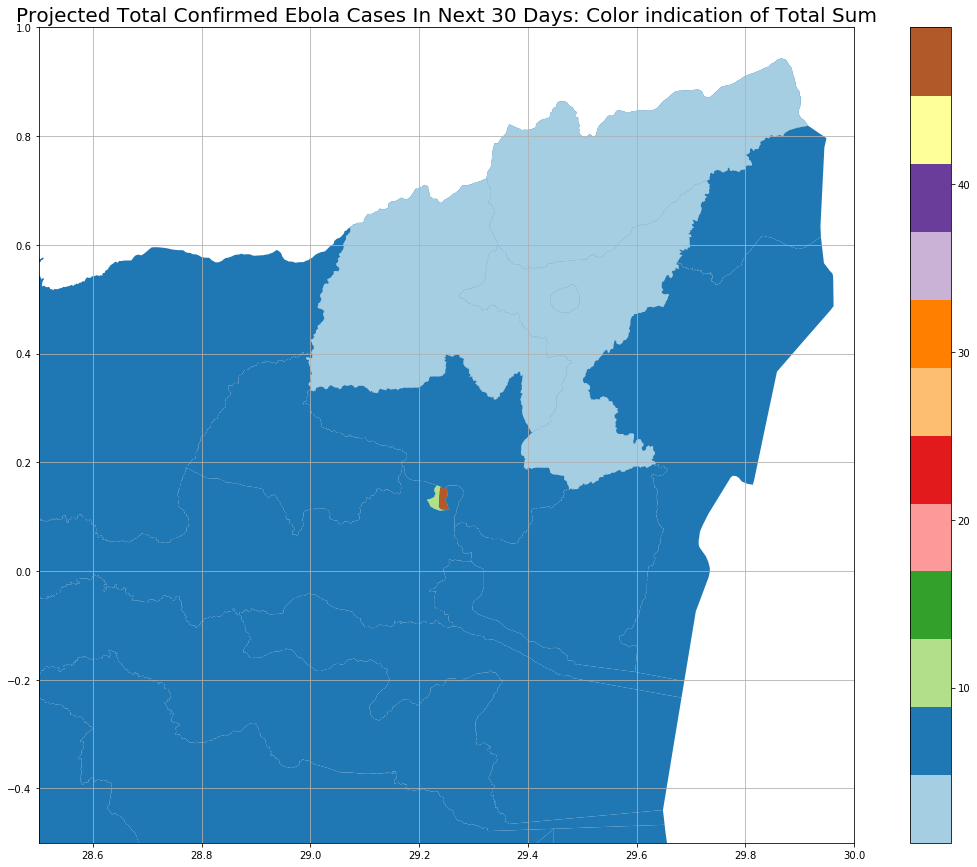

In [45]:
fig, ax = plt.subplots(1, figsize=(20,15))
base= north_kivu.plot(ax=ax)
p_gpd.plot(ax=base, column='projected', cmap='Paired', legend=True)

ax.set_xlim(28.5,30)
ax.set_ylim(-0.5, 1)
ax.grid()
ax.set_title('Projected Total Confirmed Ebola Cases In Next 30 Days: Color indication of Total Sum', fontsize=20)


#### The Total Percent of Projected Sum for the Next 30 Days

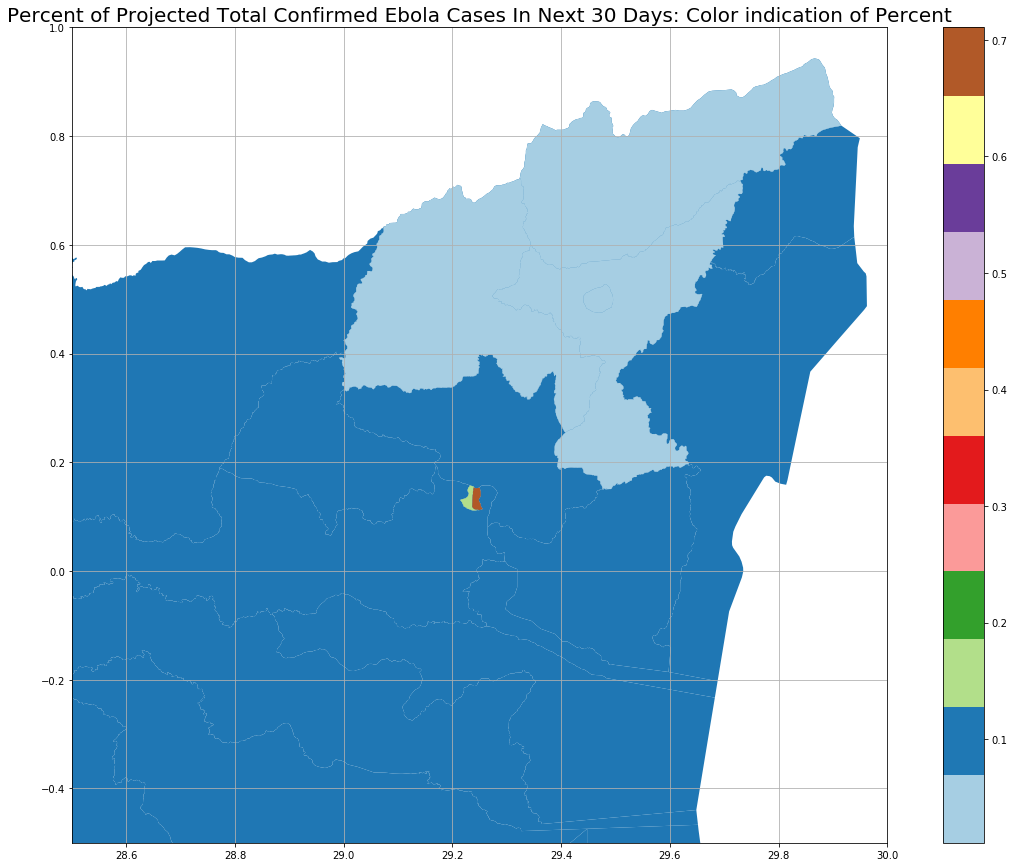

In [46]:
fig, ax = plt.subplots(1, figsize=(20,15))
base= north_kivu.plot(ax=ax)
p_gpd.plot(ax=base, column='percent_projected', cmap='Paired', legend=True)

ax.set_xlim(28.5,30)
ax.set_ylim(-0.5, 1)
ax.grid()
ax.set_title('Percent of Projected Total Confirmed Ebola Cases In Next 30 Days: Color indication of Percent', fontsize=20)


In [47]:
gdf = gpd.read_file('../data/shapefile/DRC-healthzones/zone_stc_puc.shp')
evd_df = pd.read_csv('../data/ebola_drc/drc/data.csv').fillna(0)
## removing first row, corresponding to pre-epidemic cases
evd_df = evd_df[1:]
evd_df = evd_df[evd_df.health_zone!='Ntondo'] ## Currently no cases
evd_df['Date'] = evd_df.report_date.apply(lambda x: datetime.strptime(str(x),'%Y%m%d'))
evd_df['all_cases'] = evd_df.confirmed_cases + evd_df.probable_cases + evd_df.suspect_cases

OSError: no such file or directory: '../data/shapefile/DRC-healthzones/zone_stc_puc.shp'

In [ ]:
count = 0
for rd in evd_df.report_date.unique():
    f = plt.figure(figsize=(10,10))
    ax = plt.gca()
    plt.axis('off')
    plt.title('EVD 2018 (DRC) cases until {}'.format(rd),fontsize=20)
    gdf.plot(color='#bdbdbd',ax=ax)
    df = evd_df[evd_df.report_date==rd]
    temp_gdf = gdf.merge(df,left_on='NOM_ZS',right_on='health_zone',how='inner')
    temp_gdf.plot(ax=ax,column='all_cases',cmap='PuBu',vmin=0,vmax=50,legend=True)
    display.clear_output(wait=True)
    display.display(pl.gcf())    
    plt.savefig('../plots/{:02d}.png'.format(count),bbox_inches='tight')
    count+=1
    plt.close()
call("convert -delay 200 -loop 1 ../plots/*.png ../plots/animated_DRC.gif".split(' '))
[os.remove('../plots/'+x) for x in os.listdir('../plots') if '.png' in x];

In [ ]:
zs_list = evd_df.health_zone.unique()
prov_list = gdf[gdf.NOM_ZS.isin(zs_list)]['PROVINCE'].unique()
print prov_list

In [ ]:
count = 0
mask = gdf.PROVINCE.isin(prov_list)
for rd in evd_df.report_date.unique():
    f = plt.figure(figsize=(10,10))
    ax = plt.gca()
    plt.axis('off')
    plt.title('EVD 2018 (Equateur,DRC) cases until {}'.format(rd),fontsize=20)
    gdf[mask].plot(color='#bdbdbd',ax=ax)
    df = evd_df[evd_df.report_date==rd]
    temp_gdf = gdf.merge(df,left_on='NOM_ZS',right_on='health_zone',how='inner')
    temp_gdf.plot(ax=ax,column='all_cases',cmap='PuBu',vmin=0,vmax=50,legend=True)
    display.clear_output(wait=True)
    display.display(pl.gcf())    
    plt.savefig('../plots/{:02d}.png'.format(count),bbox_inches='tight')
    count+=1
    plt.close()
call("convert -delay 200 -loop 1 ../plots/*.png ../plots/animated_Equateur.gif".split(' '))
[os.remove('../plots/'+x) for x in os.listdir('../plots') if '.png' in x];